            Open  Close  Dividends  TotalDiv  AddShares  TotalShares  \
Date                                                                   
2020-01-02  6.47   6.48        0.0       0.0        0.0        100.0   
2020-01-03  6.46   6.48        0.0       0.0        0.0        100.0   
2020-01-06  6.48   6.47        0.0       0.0        0.0        100.0   
2020-01-07  6.47   6.47        0.0       0.0        0.0        100.0   
2020-01-08  6.46   6.46        0.0       0.0        0.0        100.0   
2020-01-09  6.46   6.47        0.0       0.0        0.0        100.0   
2020-01-10  6.47   6.48        0.0       0.0        0.0        100.0   
2020-01-13  6.48   6.48        0.0       0.0        0.0        100.0   
2020-01-14  6.48   6.49        0.0       0.0        0.0        100.0   
2020-01-15  6.48   6.52        0.0       0.0        0.0        100.0   

              BHReturn  TotalReturn  
Date                                 
2020-01-02  100.000000   100.000000  
2020-01-03  100.00000

C:\Users\wband\AppData\Local\Temp\ipykernel_27916\385304107.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.91743119801181' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[date, 'TotalShares'] = total_shares


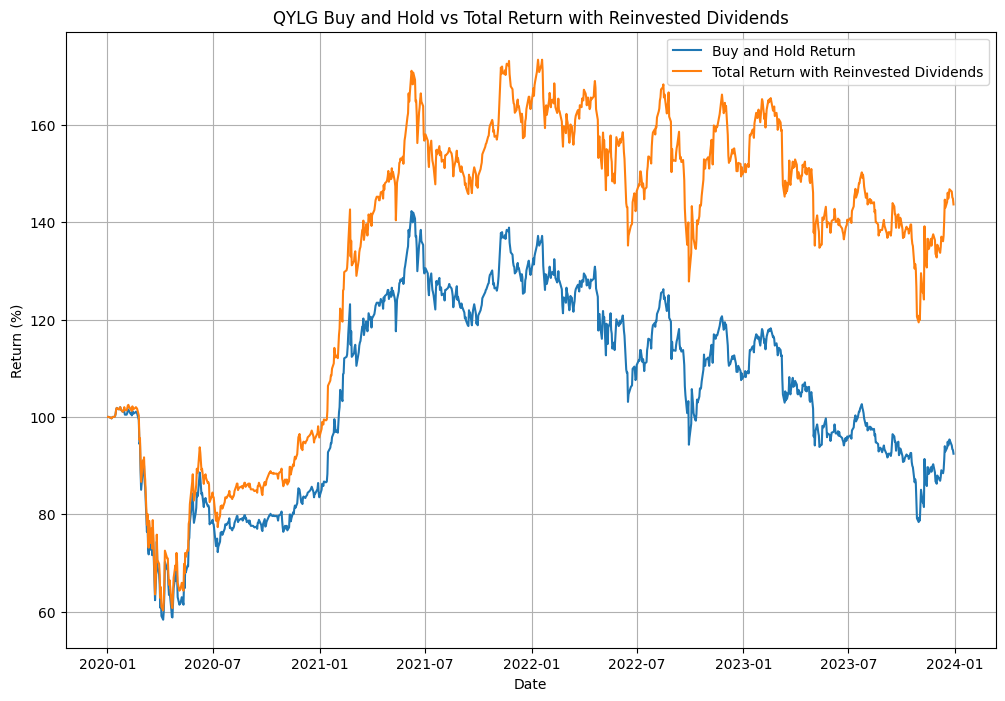

In [13]:
import yfinance as yf
import pandas as pd

# Define the stock and initial parameters
stock = "PSEC"
initial_shares = 100

# Download historical price data and dividend data
data = yf.download(stock, start="2020-01-01", end="2024-01-01", actions=True, progress=False)

# Create the initial DataFrame
df = data[['Open', 'Close', 'Dividends']].copy()
df['TotalDiv'] = 0.0
df['AddShares'] = 0.0
df['TotalShares'] = initial_shares
df['BHReturn'] = 0.0
df['TotalReturn'] = 0.0

# Calculate buy and hold returns
df['BHReturn'] = df['Close'] / df['Close'].iloc[0] * initial_shares

# Iterate over the DataFrame to calculate the dividends and reinvestments
total_dividends = 0.0
total_shares = initial_shares

for date in df.index[1:]:
    if df.at[date, 'Dividends'] > 0:
        # Calculate total dividends earned
        total_dividends += df.at[date, 'Dividends'] * total_shares
        # Calculate additional shares purchased with the reinvested dividends
        df.at[date, 'AddShares'] = total_dividends / df.at[date, 'Open']
        total_shares += df.at[date, 'AddShares']
        total_dividends = 0  # Reset total dividends after reinvestment
    else:
        df.at[date, 'AddShares'] = 0

    df.at[date, 'TotalShares'] = total_shares
    df.at[date, 'TotalDiv'] = total_dividends
    df.at[date, 'TotalReturn'] = total_shares * df.at[date, 'Close']

# Adjust TotalReturn to start from the initial investment of 100
df['TotalReturn'] = df['TotalReturn'] / df['TotalReturn'].iloc[1] * 100  # Normalize TotalReturn to start at 100
df.at[df.index[0], 'TotalReturn'] = 100  # Ensure the initial TotalReturn is exactly 100

# Display the DataFrame
print(df.head(10))  # Display the first 10 rows for a quick check

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['BHReturn'], label='Buy and Hold Return')
plt.plot(df.index, df['TotalReturn'], label='Total Return with Reinvested Dividends')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title('QYLG Buy and Hold vs Total Return with Reinvested Dividends')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
df.to_clipboard()

                 Open      Close  Dividends  TotalDiv  AddShares  TotalShares  \
Date                                                                            
2022-05-04  50.099998  51.095001        0.0       0.0        0.0        100.0   
2022-05-05  51.000000  49.880001        0.0       0.0        0.0        100.0   
2022-05-06  49.369999  49.209999        0.0       0.0        0.0        100.0   
2022-05-09  48.990002  47.720001        0.0       0.0        0.0        100.0   
2022-05-10  48.340000  48.063000        0.0       0.0        0.0        100.0   
2022-05-11  47.720001  46.889999        0.0       0.0        0.0        100.0   
2022-05-12  46.389999  46.687000        0.0       0.0        0.0        100.0   
2022-05-13  47.820000  48.299999        0.0       0.0        0.0        100.0   
2022-05-16  48.380001  48.049999        0.0       0.0        0.0        100.0   
2022-05-17  48.810001  48.938999        0.0       0.0        0.0        100.0   

              BHReturn  Tot

C:\Users\wband\AppData\Local\Temp\ipykernel_27916\1367136214.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.76484947348875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[date, 'TotalShares'] = total_shares


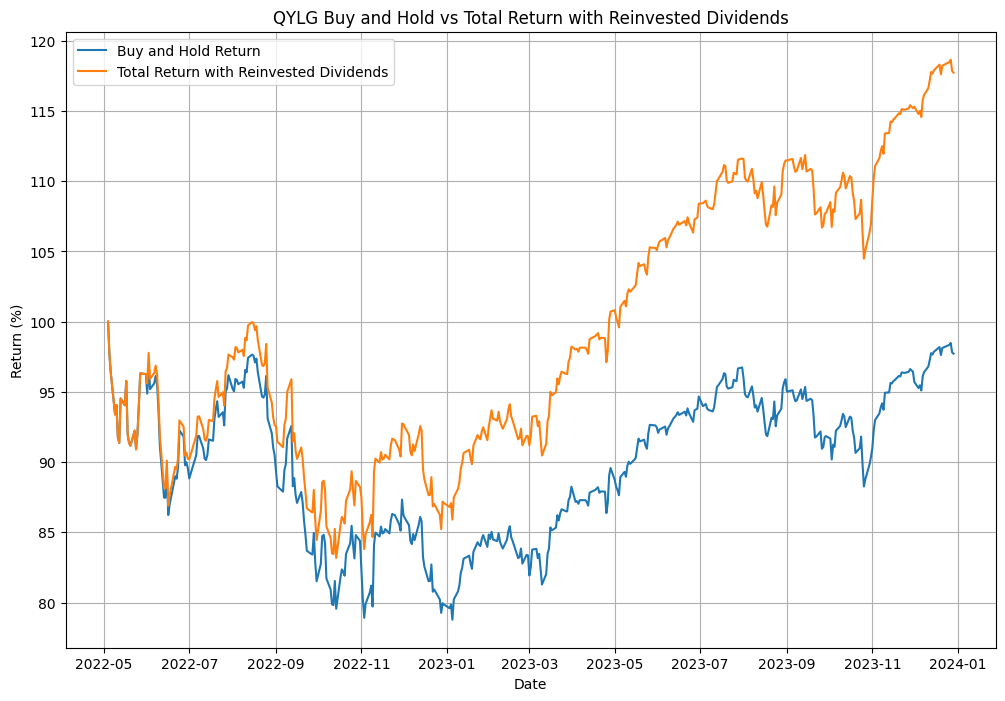

In [3]:
import yfinance as yf
import pandas as pd

# Define the stock and initial parameters
stock = "JEPQ"
initial_shares = 100

# Download historical price data and dividend data
data = yf.download(stock, start="2020-01-01", end="2024-01-01", actions=True, progress=False)

# Create the initial DataFrame
df = data[['Open', 'Close', 'Dividends']].copy()
df['TotalDiv'] = 0.0
df['AddShares'] = 0.0
df['TotalShares'] = initial_shares
df['BHReturn'] = 0.0
df['TotalReturn'] = 0.0

# Calculate buy and hold returns
df['BHReturn'] = df['Close'] / df['Close'].iloc[0] * 100

# Iterate over the DataFrame to calculate the dividends and reinvestments
total_dividends = 0.0
total_shares = initial_shares

for date in df.index:
    if df.at[date, 'Dividends'] > 0:
        # Calculate total dividends earned
        total_dividends += df.at[date, 'Dividends'] * total_shares
        # Calculate additional shares purchased with the reinvested dividends
        df.at[date, 'AddShares'] = total_dividends / df.at[date, 'Open']
        total_shares += df.at[date, 'AddShares']
        total_dividends = 0  # Reset total dividends after reinvestment
    else:
        df.at[date, 'AddShares'] = 0

    df.at[date, 'TotalShares'] = total_shares
    df.at[date, 'TotalDiv'] = total_dividends
    df.at[date, 'TotalReturn'] = total_shares * df.at[date, 'Close']

# Normalize TotalReturn to start at the same level as BHReturn
df['TotalReturn'] = df['TotalReturn'] / df['TotalReturn'].iloc[0] * 100

# Ensure the initial TotalReturn is exactly 100
df.at[df.index[0], 'TotalReturn'] = df.at[df.index[0], 'BHReturn']

# Display the DataFrame
print(df.head(10))  # Display the first 10 rows for a quick check

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['BHReturn'], label='Buy and Hold Return')
plt.plot(df.index, df['TotalReturn'], label='Total Return with Reinvested Dividends')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title('QYLG Buy and Hold vs Total Return with Reinvested Dividends')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
df['TotalShares'].iloc[-1]

120.48115866063762

In [5]:
df.to_clipboard()

C:\Users\wband\AppData\Local\Temp\ipykernel_27916\3562679443.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.429428480178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[date, 'TotalShares'] = total_shares


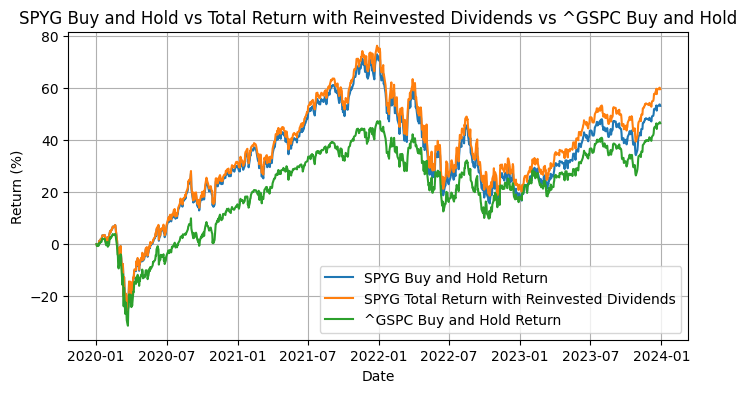

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock and initial parameters
stock = "SPYG"
benchmark = "^GSPC"
initial_shares = 100
start="2020-01-01"
end="2024-01-01"

# Download historical price data and dividend data for the stock
data_stock = yf.download(
    stock, 
    start=start, 
    end=end, 
    actions=True, 
    progress=False)

# Download historical price data for the benchmark
data_benchmark = yf.download(
    benchmark, 
    start=start, 
    end=end, 
    progress=False)

# Align the data by date
common_dates = data_stock.index.intersection(data_benchmark.index)
data_stock = data_stock.loc[common_dates]
data_benchmark = data_benchmark.loc[common_dates]

# Create the initial DataFrame for the stock
df = data_stock[['Open', 'Close', 'Dividends']].copy()
df['TotalDiv'] = 0.0
df['AddShares'] = 0.0
df['TotalShares'] = initial_shares
df['BHReturn'] = 0.0
df['TotalReturn'] = 0.0

# Calculate buy and hold returns for the stock
df['BHReturn'] = ((df['Close'] / df['Close'].iloc[0]) - 1) * 100

# Iterate over the DataFrame to calculate the dividends and reinvestments
total_dividends = 0.0
total_shares = initial_shares

for date in df.index:
    if df.at[date, 'Dividends'] > 0:
        # Calculate total dividends earned
        total_dividends += df.at[date, 'Dividends'] * total_shares
        # Calculate additional shares purchased with the reinvested dividends
        df.at[date, 'AddShares'] = total_dividends / df.at[date, 'Open']
        total_shares += df.at[date, 'AddShares']
        total_dividends = 0  # Reset total dividends after reinvestment
    else:
        df.at[date, 'AddShares'] = 0

    df.at[date, 'TotalShares'] = total_shares
    df.at[date, 'TotalDiv'] = total_dividends
    df.at[date, 'TotalReturn'] = total_shares * df.at[date, 'Close']

# Normalize TotalReturn to start at the same level as BHReturn
df['TotalReturn'] = ((df['TotalReturn'] / df['TotalReturn'].iloc[0]) - 1) * 100

# Ensure the initial TotalReturn is exactly 100
df.at[df.index[0], 'TotalReturn'] = df.at[df.index[0], 'BHReturn']

# Calculate buy and hold returns for the benchmark
benchmark_df = data_benchmark[['Close']].copy()
benchmark_df['BenchmarkReturn'] = ((benchmark_df['Close'] / benchmark_df['Close'].iloc[0]) - 1) * 100

# Display the DataFrames
# print(df.head(10))  # Display the first 10 rows for a quick check
# print(benchmark_df.head(10))  # Display the first 10 rows of the benchmark for a quick check

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['BHReturn'], label=f'{stock} Buy and Hold Return')
plt.plot(df.index, df['TotalReturn'], label=f'{stock} Total Return with Reinvested Dividends')
plt.plot(benchmark_df.index, benchmark_df['BenchmarkReturn'], label=f'{benchmark} Buy and Hold Return')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title(f'{stock} Buy and Hold vs Total Return with Reinvested Dividends vs {benchmark} Buy and Hold')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
df['Dividends'].describe()

count    823.000000
mean       0.010166
std        0.115192
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.207000
Name: Dividends, dtype: float64

In [8]:
# TODO: Optimize a portfolio of stocks by taking list of stocks and optimizing for max return based on TotalReturn

C:\Users\wband\AppData\Local\Temp\ipykernel_27916\183801876.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.76484947348875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[date, 'TotalShares'] = total_shares
C:\Users\wband\AppData\Local\Temp\ipykernel_27916\183801876.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.50267819406231' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[date, 'TotalShares'] = total_shares
C:\Users\wband\AppData\Local\Temp\ipykernel_27916\183801876.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.98837206604408' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  d

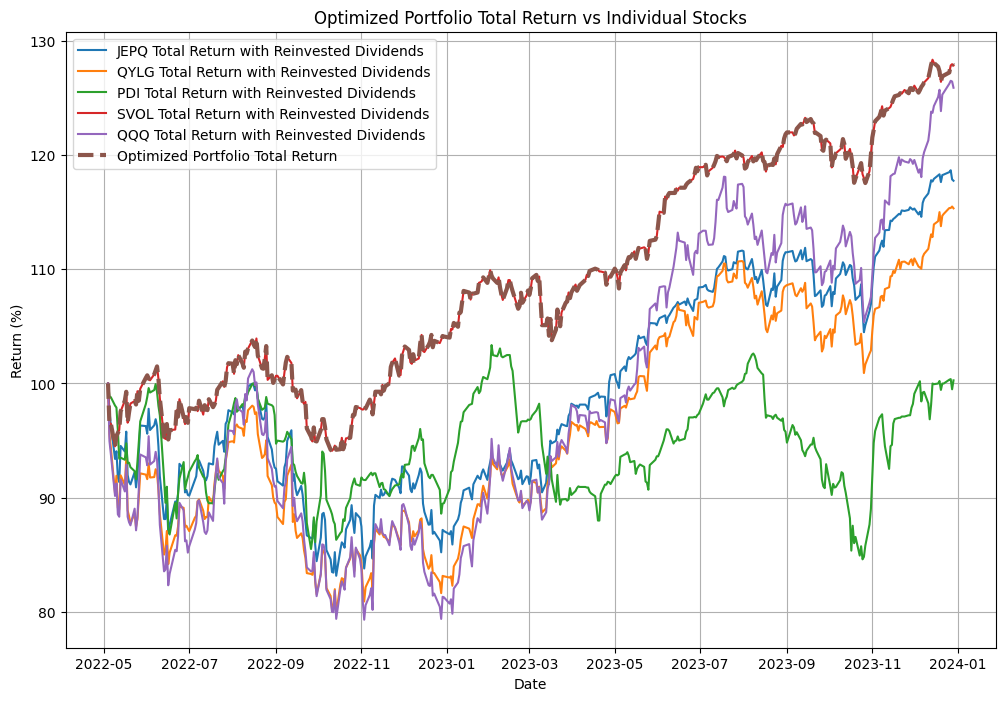

Optimal Weights for the Portfolio:
JEPQ: 0.0000
QYLG: 0.0000
PDI: 0.0000
SVOL: 1.0000
QQQ: 0.0000


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the list of stocks and the initial parameters
stocks = ["JEPQ", "QYLG", "PDI", "SVOL", "QQQ"]
benchmark = "QQQ"
initial_shares = 100

def download_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2024-01-01", actions=True, progress=False)
    return data

def calculate_total_return(data, initial_shares):
    df = data[['Open', 'Close', 'Dividends']].copy()
    df['TotalDiv'] = 0.0
    df['AddShares'] = 0.0
    df['TotalShares'] = initial_shares
    df['TotalReturn'] = 0.0

    total_dividends = 0.0
    total_shares = initial_shares

    for date in df.index:
        if df.at[date, 'Dividends'] > 0:
            total_dividends += df.at[date, 'Dividends'] * total_shares
            df.at[date, 'AddShares'] = total_dividends / df.at[date, 'Open']
            total_shares += df.at[date, 'AddShares']
            total_dividends = 0  # Reset total dividends after reinvestment
        else:
            df.at[date, 'AddShares'] = 0

        df.at[date, 'TotalShares'] = total_shares
        df.at[date, 'TotalDiv'] = total_dividends
        df.at[date, 'TotalReturn'] = total_shares * df.at[date, 'Close']

    # Normalize TotalReturn to start at 100
    df['TotalReturn'] = df['TotalReturn'] / df['TotalReturn'].iloc[0] * 100
    return df

def optimize_portfolio(returns):
    n = len(returns.columns)
    args = (returns.mean(),)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    result = minimize(portfolio_return, n * [1. / n,], args=args, bounds=bounds, constraints=constraints)
    return result.x

def portfolio_return(weights, returns_mean):
    return -np.dot(weights, returns_mean)

# Download data for each stock and align dates
data_dict = {stock: download_data(stock) for stock in stocks}

# Align dates for all stocks
common_dates = data_dict[stocks[0]].index
for stock in stocks[1:]:
    common_dates = common_dates.intersection(data_dict[stock].index)
for stock in stocks:
    data_dict[stock] = data_dict[stock].loc[common_dates]

# Calculate total returns for each stock
total_return_dict = {stock: calculate_total_return(data, initial_shares) for stock, data in data_dict.items()}

# Create a DataFrame for total returns of all stocks
total_returns = pd.DataFrame({stock: total_return_dict[stock]['TotalReturn'] for stock in stocks}, index=common_dates)

# Optimize the portfolio
optimal_weights = optimize_portfolio(total_returns)

# Calculate the performance of the optimized portfolio
total_returns['OptimizedPortfolio'] = total_returns.dot(optimal_weights)

# Normalize the optimized portfolio to start at 100
total_returns['OptimizedPortfolio'] = total_returns['OptimizedPortfolio'] / total_returns['OptimizedPortfolio'].iloc[0] * 100

# Plot the results
plt.figure(figsize=(12, 8))
for stock in stocks:
    plt.plot(total_return_dict[stock].index, total_return_dict[stock]['TotalReturn'], label=f'{stock} Total Return with Reinvested Dividends')
plt.plot(total_returns.index, total_returns['OptimizedPortfolio'], label='Optimized Portfolio Total Return', linewidth=3, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title('Optimized Portfolio Total Return vs Individual Stocks')
plt.legend()
plt.grid(True)
plt.show()

# Display the optimal weights
print("Optimal Weights for the Portfolio:")
for stock, weight in zip(stocks, optimal_weights):
    print(f'{stock}: {weight:.4f}')


C:\Users\wband\AppData\Local\Temp\ipykernel_27916\3320050219.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yield'] = (data['Dividends'] / data['Close']) * 100
C:\Users\wband\AppData\Local\Temp\ipykernel_27916\3320050219.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yield'] = (data['Dividends'] / data['Close']) * 100
C:\Users\wband\AppData\Local\Temp\ipykernel_27916\3320050219.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

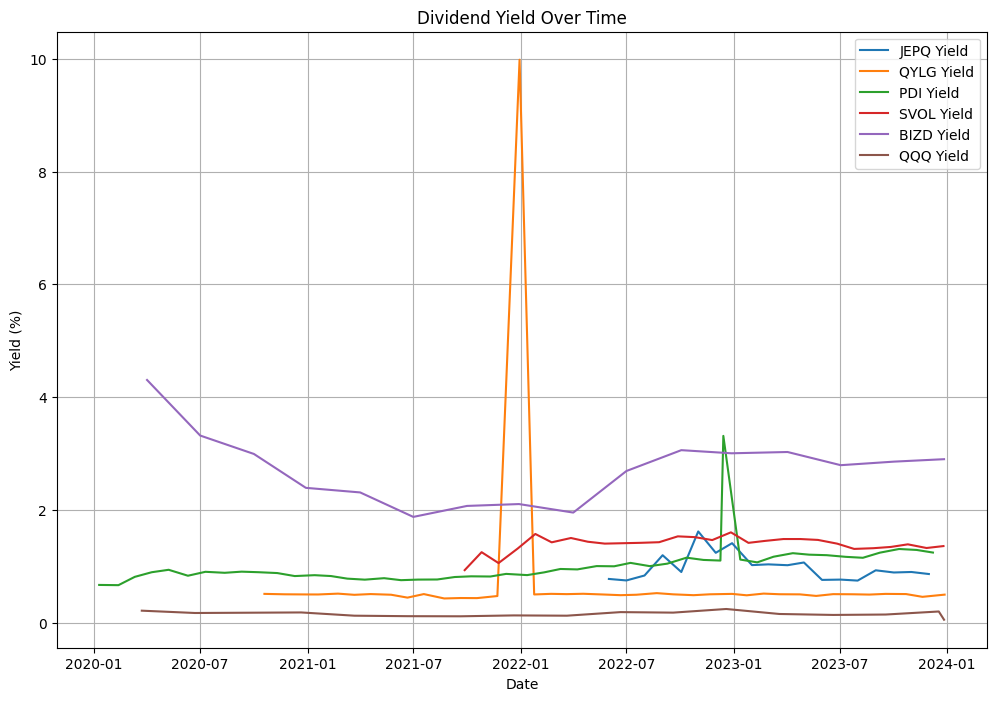

Sample yield data for JEPQ:
                Close  Dividends     Yield
Date                                      
2022-06-01  48.478001      0.376  0.775610
2022-07-01  45.389999      0.340  0.749064
2022-08-01  48.650002      0.407  0.836588
2022-09-01  45.639999      0.546  1.196319
2022-10-03  42.279999      0.380  0.898770
2022-11-01  42.090000      0.681  1.617962
2022-12-01  44.060001      0.546  1.239219
2022-12-29  40.849998      0.576  1.410037
2023-02-01  43.189999      0.441  1.021070
2023-03-01  41.860001      0.433  1.034400
Sample yield data for QYLG:
                Close  Dividends     Yield
Date                                      
2020-10-19  27.408001      0.140  0.510800
2020-11-23  28.212999      0.142  0.503314
2020-12-30  29.750000      0.149  0.500840
2021-01-19  29.979000      0.150  0.500350
2021-02-22  30.280001      0.156  0.515192
2021-03-22  29.745001      0.147  0.494201
2021-04-19  30.740000      0.156  0.507482
2021-05-24  30.260000      0.150  0.49570

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of stocks and the initial parameters
stocks = ["JEPQ", "QYLG", "PDI", "SVOL", "BIZD", "QQQ"]
benchmark = "QQQ"
initial_shares = 100

def download_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2024-01-01", actions=True, progress=False)
    return data

def calculate_yield(data):
    data = data[data['Dividends'] > 0]
    data['Yield'] = (data['Dividends'] / data['Close']) * 100
    return data

# Download data and calculate yield for each stock
data_dict = {stock: download_data(stock) for stock in stocks}
yield_dict = {stock: calculate_yield(data) for stock, data in data_dict.items()}

# Plotting the yields
plt.figure(figsize=(12, 8))
for stock in stocks:
    plt.plot(yield_dict[stock].index, yield_dict[stock]['Yield'], label=f'{stock} Yield')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.title('Dividend Yield Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Display a sample of the yield data
for stock in stocks:
    print(f"Sample yield data for {stock}:")
    print(yield_dict[stock][['Close', 'Dividends', 'Yield']].head(10))


In [11]:
stocks

['JEPQ', 'QYLG', 'PDI', 'SVOL', 'BIZD', 'QQQ']

In [12]:
yield_dict['JEPQ']

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Capital Gains,Yield
Date,,,,,,,,,,
2022-06-01,49.160000,49.240002,48.169998,48.478001,38.707752,38000,0.376,0.0,0.0,0.775610
2022-07-01,45.230000,45.389999,44.750000,45.389999,36.513401,209100,0.340,0.0,0.0,0.749064
2022-08-01,48.750000,48.939999,48.480000,48.650002,39.462658,259600,0.407,0.0,0.0,0.836588
2022-09-01,45.520000,45.810001,44.700001,45.639999,37.463444,322800,0.546,0.0,0.0,1.196319
2022-10-03,41.689999,42.470001,41.459999,42.279999,35.024952,321300,0.380,0.0,0.0,0.898770
2022-11-01,42.840000,42.889999,42.029999,42.090000,35.427067,403200,0.681,0.0,0.0,1.617962
2022-12-01,44.150002,44.200001,43.880001,44.060001,37.544636,482600,0.546,0.0,0.0,1.239219
2022-12-29,40.369999,40.959999,40.270000,40.849998,35.311512,583700,0.576,0.0,0.0,1.410037
2023-02-01,42.869999,43.340000,42.709999,43.189999,37.717960,1303800,0.441,0.0,0.0,1.021070
